In [1]:
%pylab inline
import pandas as pd
from datetime import datetime
import seaborn as sns
import missingno as mn
import numpy as np
from scipy import spatial
%matplotlib inline
import matplotlib.pyplot as plt





Populating the interactive namespace from numpy and matplotlib


(array([1.10495e+05, 2.90110e+04, 6.37700e+03, 2.33000e+03, 1.32700e+03,
        3.60000e+02, 3.59000e+02, 2.11000e+02, 1.43000e+02, 6.80000e+01]),
 array([2.7000000e-01, 8.8649190e+03, 1.7729568e+04, 2.6594217e+04,
        3.5458866e+04, 4.4323515e+04, 5.3188164e+04, 6.2052813e+04,
        7.0917462e+04, 7.9782111e+04, 8.8646760e+04]),
 <a list of 10 Patch objects>)

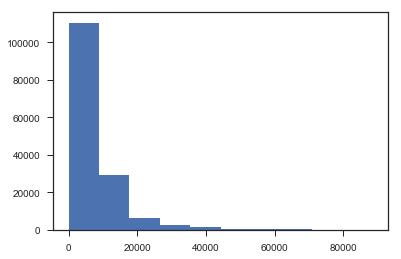

In [22]:
Feature = pd.read_csv("desktop/Springboard- Data Science/Features data set.csv")
Sales = pd.read_csv("desktop/Springboard- Data Science/sales data-set.csv")
Stores = pd.read_csv("desktop/Springboard- Data Science/stores data-set.csv")
Output = Sales.merge(Stores, on = 'Store', how = 'left' )
Feature = Feature.drop('IsHoliday', axis = 1)
Output = Output.merge(Feature, on = ['Date','Store'], how = 'left')
data = Output[Output.MarkDown1.notnull()].MarkDown1
hist(data)

In [ ]:


#Across 45 Stores, Holiday does seem to yield more sales than non-holiday days. The weeklys_Sales is a lot more spread out during holidays vs. non-holiday days
#Between Type and IsHoliday, looks like whether it is a holiday doesn't really affect weekly_sales for different types of store
sns.violinplot(x='Store',y='Weekly_Sales',hue="IsHoliday",data = Output,split=True)
sns.violinplot(x='Type',y='Weekly_Sales',hue="IsHoliday",data = Output,split=True)


#As MarkDwon increase Type C has lower Weekly_Sale - Need further investigation to understand the reason
#Both Type A and Type B have an increasng trend, as MarkDown1 increase, Weekly_Sale increases. MarkDown2,3,4,5, as markdown increases all types increase as well

sns.lmplot(x='MarkDown1',y='Weekly_Sales', col= 'Type', hue = 'Type',data=Output)
sns.lmplot(x='MarkDown2',y='Weekly_Sales', col= 'Type', hue = 'Type',data=Output)
sns.lmplot(x='MarkDown3',y='Weekly_Sales', col= 'Type', hue = 'Type',data=Output)
sns.lmplot(x='MarkDown4',y='Weekly_Sales', col= 'Type', hue = 'Type',data=Output)
sns.lmplot(x='MarkDown5',y='Weekly_Sales', col= 'Type', hue = 'Type',data=Output)

#Some Dept outperforms the other
sns.boxplot(x='Dept', y = 'Weekly_Sales', data = Output)

#Some Dept outperform others in Type A sotre, some outperform in Type B store, and some ourperform in Type C store
sns.boxplot(x='Dept', y = 'Weekly_Sales', hue = 'Type', data = Output)

#Sales are not differed a lot by Month
sns.boxplot(x='Month', y = 'Weekly_Sales', data = Output)
sns.boxplot(x='Month', y = 'Weekly_Sales', hue = 'Type', data = Output)

#IsHolday is also not differed a lot by Month
sns.boxplot(x='Month', y = 'Weekly_Sales', data = Output)

#Type A has higher Sales
sns.boxplot(x='Type', y = 'Weekly_Sales', data = Output)

StoreA = Output[Output['Type'] == 'A']
#Type A store has different sale performance, should check if Type A sales across stores are significantly different.
sns.boxplot(x = 'Store', y = 'Weekly_Sales', data = StoreA)
#Type A store, Sales differ by Dept
sns.boxplot(x = 'Dept', y = 'Weekly_Sales', data = StoreA)
#Month doesn't seem to affect Sales for Type A Store
sns.boxplot(x = 'Month', y = 'Weekly_Sales', data = StoreA)
#Year dosen't seem to affect Sales for Type A Store
sns.boxplot(x = 'Year', y = 'Weekly_Sales', data = StoreA)
#Holiday doesn't seem to affect Weekly Sales
sns.boxplot(x= 'IsHoliday', y = 'Weekly_Sales', data = StoreA)
#May have some correlation
sns.lmplot(x = 'Size', y = 'Weekly_Sales', data = StoreA)
sns.boxplot(x = 'Size', y = 'Weekly_Sales', data = StoreA)



##########################  Trend   #################################
Sales = pd.read_csv("desktop/Springboard- Data Science/sales data-set.csv")
Stores = pd.read_csv("desktop/Springboard- Data Science/stores data-set.csv")
OutPutPivot = Sales.merge(Stores,on='Store',how='left')
sns.set_style("dark")
sns.set(style="ticks")
table = pd.pivot_table(OutPutPivot, index= ['Date'],values  = ['Weekly_Sales'], columns = ['Type'])
table.plot()
plt.show()






In [ ]:
############################# Approach the problem through regression #######################################

# Merged 3 datasets Feature, Sales, and Feature



Feature = pd.read_csv("desktop/Springboard- Data Science/Features data set.csv")
Sales = pd.read_csv("desktop/Springboard- Data Science/sales data-set.csv")
Output = Sales.merge(Stores, on = 'Store', how = 'left' )
Feature = Feature.drop('IsHoliday', axis = 1)
Output = Output.merge(Feature, on = ['Date','Store'], how = 'left')
missingno.bar(Output,color='blue',log=True,figsize=(30,18))

#msno.bar(merged_df[missingdata_df], color="blue", log=True, figsize=(30,18))
#print(Output[Output.MarkDown1.notnull()].head())

# # Store           421570 non-null int64 - Converts to string
# # Dept            421570 non-null int64 - Converts to string
# # Date            421570 non-null object - Converts to datetime
# # Weekly_Sales    421570 non-null float64
# # IsHoliday       421570 non-null bool
# # Type            421570 non-null object
# # Size            421570 non-null int64
# # Temperature     421570 non-null float64
# # Fuel_Price      421570 non-null float64
# # MarkDown1       150681 non-null float64
# # MarkDown2       111248 non-null float64
# # MarkDown3       137091 non-null float64
# # MarkDown4       134967 non-null float64
# # MarkDown5       151432 non-null float64
# # CPI             421570 non-null float64
# # Unemployment    421570 non-null float64

# # Convert date types: Store, Dept and Date
# Output['Store']=Output['Store'].astype('category')
# Output['Dept']=Output['Dept'].astype('category')
# Output['Type']=Output['Type'].astype('category')
# Output['Date']=pd.to_datetime(Output['Date'],format = '%d/%m/%Y')

# #  How should I treate MarkDown variable? : anonymized data related to promotional markdowns. 
# #      MarkDown data is only available after Nov 2011, and is not available for all stores all the time. 
# #      Any missing value is marked with an NA
# #         MarkDown1       150681 non-null float64
# #         MarkDown2       111248 non-null float64
# #         MarkDown3       137091 non-null float64
# #         MarkDown4       134967 non-null float64
# #         MarkDown5       151432 non-null float64


# #  How should I treat Date variable? : Treat month of the year as a seperate variable

# #  Missing values : some stores have missing values for certian days, and some stores are missing dept values


# Output.describe()
# Output[Output['Weekly_Sales'] <=0]
# # Store1=Output[Output['Store'] == 1]
# # print(Store1.head())
# # plt.subplot(2,1,1)
# # Store1['Weekly_Sales'].plot(kind='hist')
# # # plt.subplot(212)
# # # Output['Weekly_Sales'].plot(kind = 'hist',xlim=[1,200000])

# # # Per Store graph
# # for x in range(45):
# #         plt.subplot(5,9,x+1)
# #         perStore=Output[Output['Store'] == x+1]
# #         perStore['Weekly_Sales'].plot(kind = 'hist', xlim=[0,250000])


# Output.boxplot(column = 'Weekly_Sales', by='IsHoliday')

# # ##Continued from above
# # ###Now as three separate arrays
# # x1 = mu + sigma*np.random.randn(990,1)
# # x2 = mu + sigma*np.random.randn(980,1)
# # x3 = mu + sigma*np.random.randn(1000,1)

# # #Stack the data
# # plt.figure()
# # plt.hist([x1,x2,x3], bins, stacked=True, normed = True)
# # plt.show()

# data1=Output[Output['IsHoliday']==True]
# data2=Output[Output['IsHoliday']==False]
# plt.figure()
# plt.hist(data1)


In [22]:
import sqlite3
connection = sqlite3.connect("company.db")


In [115]:
Sales = pd.read_csv("desktop/Springboard- Data Science/sales data-set.csv")
Sales['Date'] = pd.to_datetime(Sales['Date'], format = '%d/%m/%Y')
Feature = pd.read_csv("desktop/Springboard- Data Science/Features data set.csv")
Feature['Date'] = pd.to_datetime(Feature['Date'], format = '%d/%m/%Y')
Stores = pd.read_csv("desktop/Springboard- Data Science/stores data-set.csv")

OutPut = Sales.merge(Stores,on='Store',how='left')
OutPut = OutPut.merge(Feature, on = ['Date','Store'],how = 'left')
table = pd.pivot_table(OutPut, index= ['Date','IsHoliday_x'],values  = ['Weekly_Sales'], columns = ['Store','Dept','Type','Size'],)
print(table.head())

#################### FOR LOOP TO MERGE THE DATA###########################################
# grouped = Sales.groupby(['Store'])
# df=dict((tuple(grouped))) 
# for i in df.keys():
#     groupDept = dict((tuple(df[i].groupby(['Dept']))))
#     for x in groupDept.keys():
#         if(i == 1 and x == 1  ):
#             OutPut = pd.DataFrame.from_dict(groupDept[x],orient='columns')
#             OutPut['Date'] = pd.to_datetime(OutPut['Date'], format='%d/%m/%Y')
#             OutPut=OutPut.drop(['Store','Dept'],axis =1)
#             OutPut=OutPut.rename(columns={'Weekly_Sales':'Store'+str(i)+'Dept'+str(x)})
#             print(OutPut.head())
            
#         else:
            
#             data = pd.DataFrame.from_dict(groupDept[x],orient='columns')
#             data=data.drop(['Store','Dept','IsHoliday'],axis =1)
#             data=data.rename(columns={'Weekly_Sales':'Store'+str(i)+'Dept'+str(x)})
#             print(data.head())
#             data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
#             OutPut = OutPut.merge(data,on ='Date',how = 'left')  
#             print(OutPut.head())
        
# two=df[2]
# thirty=df[45]
# data1=dict((tuple(one.groupby(['Dept']))))
# data2=dict((tuple(two.groupby(['Dept']))))
# data30=dict((tuple(thirty.groupby(['Dept']))))
# data11=pd.DataFrame.from_dict(data1[1],orient='columns')
# data21=pd.DataFrame.from_dict(data2[1],orient='columns')
# data301=pd.DataFrame.from_dict(data30[98],orient='columns')

# dataMerge=data11.merge(data21,on=['Date','IsHoliday'],how='inner')
# dataMerge=dataMerge.merge(data301,on=['Date','IsHoliday'],how='inner')

# print(dataMerge)

#print(df)
#caller.set_index('key').join(other.set_index('key'))
# for i in df.keys():
#     DF=pd.DataFrame.from_dict(df[i],orient='columns') 
#     DF=DF.set_index('Date')
#     if(i == 1):
#         OutDF=DF.set_index('Date')
#     else:
#         OutDF=OutDF.join(DF,how='outer')
# data=pd.DataFrame.from_dict(df[1],orient='columns')
# data2=pd.DataFrame.from_dict(df[2],orient='columns')
# data3=pd.DataFrame.from_dict(df[3],orient='columns')
# data=data.merge(data2,on='Date',how='left')
# print(data)

#print(data[data['Dept']==2])


                       Weekly_Sales                                          \
Store                            1                                            
Dept                             1         2         3         4         5    
Type                              A         A         A         A         A   
Size                         151315    151315    151315    151315    151315   
Date       IsHoliday_x                                                        
2010-02-05 False           24924.50  50605.27  13740.12  39954.04  32229.38   
2010-02-12 True            46039.49  44682.74  10887.84  35351.21  29620.81   
2010-02-19 False           41595.55  47928.89  11523.47  36826.95  26468.27   
2010-02-26 False           19403.54  44292.87  11135.17  34660.16  24101.89   
2010-03-05 False           21827.90  48397.98  12275.58  38086.19  23082.14   

                                                                         \
Store                                                  